# My first MarkDown
this is actually the first 
i'm gonna make a list
<a id = contents></a>
1. [Import libraries](#imports)
1. [Import data](#import_data)
1. [Data exploration](#data_exploration)
1. [Data cleaning](#data_cleaning)
1. [Data preparation](#data_preparation)
1. [Benchmark model](#benchmark_model)
1. [Feature engineering](#feature_engineering)
1. [Model training](#model_training)
    * [Decision tree](#decision_tree)
    * [Random forest](#random_forest)
    * [Compare algorithm performances](#compare_performances)
1. [Tuning](#tuning)

# Import Libraries <a id ='imports'></a>

In [257]:
import pandas as pd 
import numpy as np


[Back to List](#contents)

# Import Data <a id ='import_data'></a>

In [261]:
taxi_df = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')

print(taxi_df.shape)
taxi_df.head()


(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


[Back to List](#contents)

# Data Exploration <a id ='data_exploration'></a>

In [265]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

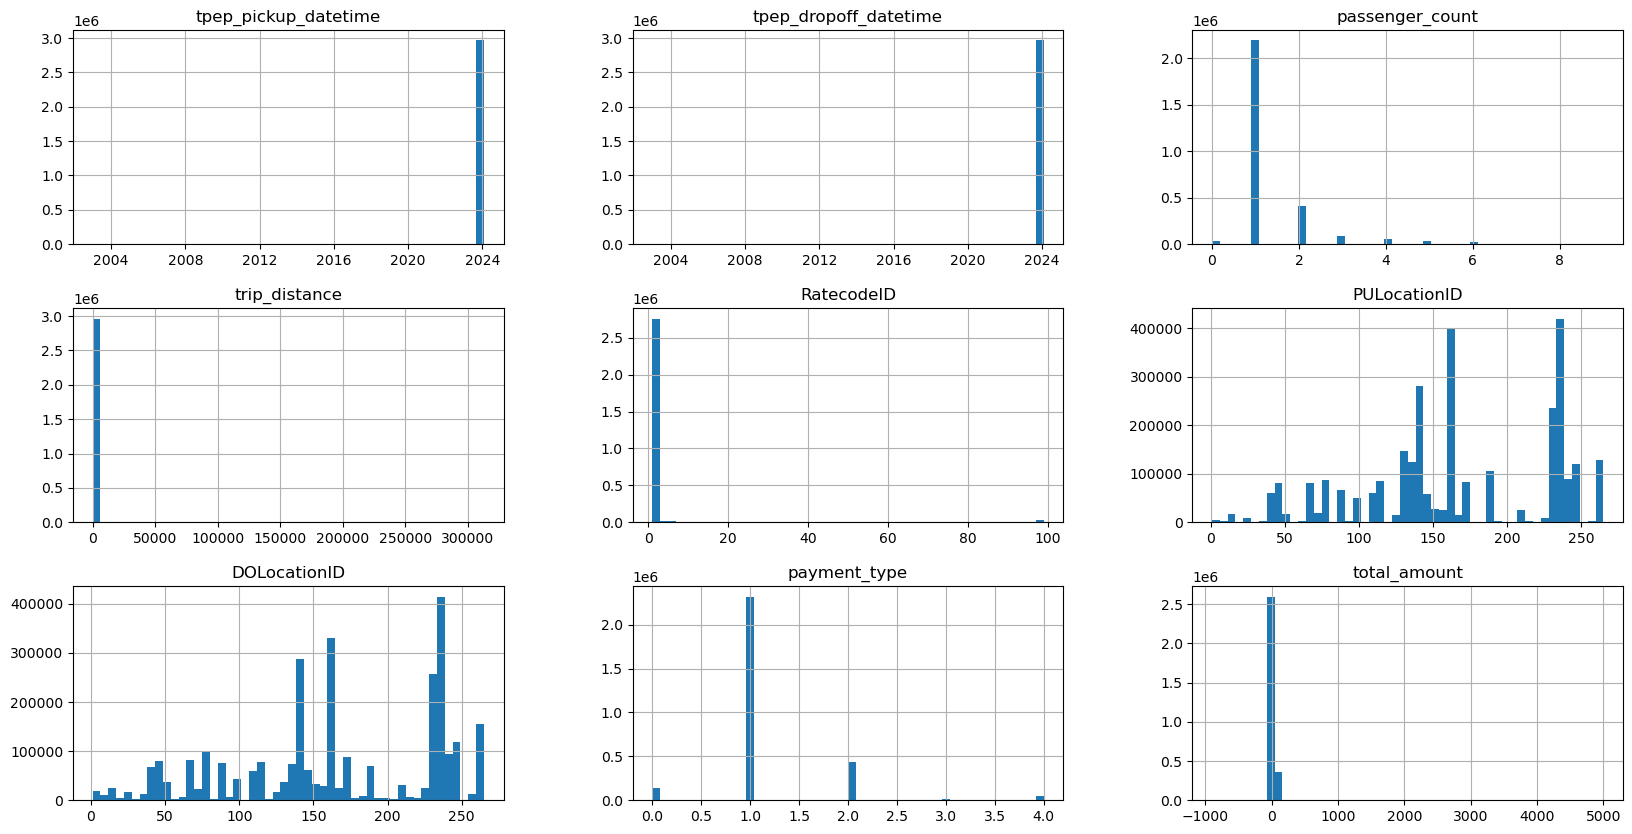

In [267]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime' , 'passenger_count', 'trip_distance', 'RatecodeID',
                   'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

#taxi_df['total_amount'].loc[13:130].plot(kind = 'bar')
#taxi_df['passenger_count'].loc[13:1300].plot(kind ='area')

taxi_df.hist(figsize = (20,10) , bins = 50)

In [268]:
#taxi_df['total_amount'].value_counts()
#taxi_df.hist(figsize = (20,10) , bins = 50)
#taxi_df.reset_index().plot(kind = 'scatter', y = 'total_amount'  , x = 'index' , figsize = (10,10))

taxi_df['passenger_count'].value_counts()

passenger_count
1.0    2188739
2.0     405103
3.0      91262
4.0      51974
5.0      33506
0.0      31465
6.0      22353
8.0         51
7.0          8
9.0          1
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

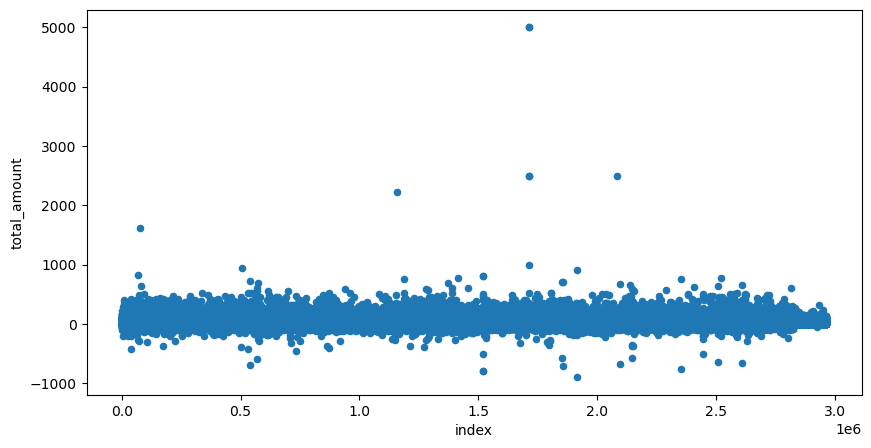

In [271]:
taxi_df.reset_index().plot(kind = 'scatter', y = 'total_amount'  , x = 'index' , figsize = (10,5))

<Axes: xlabel='index', ylabel='total_amount'>

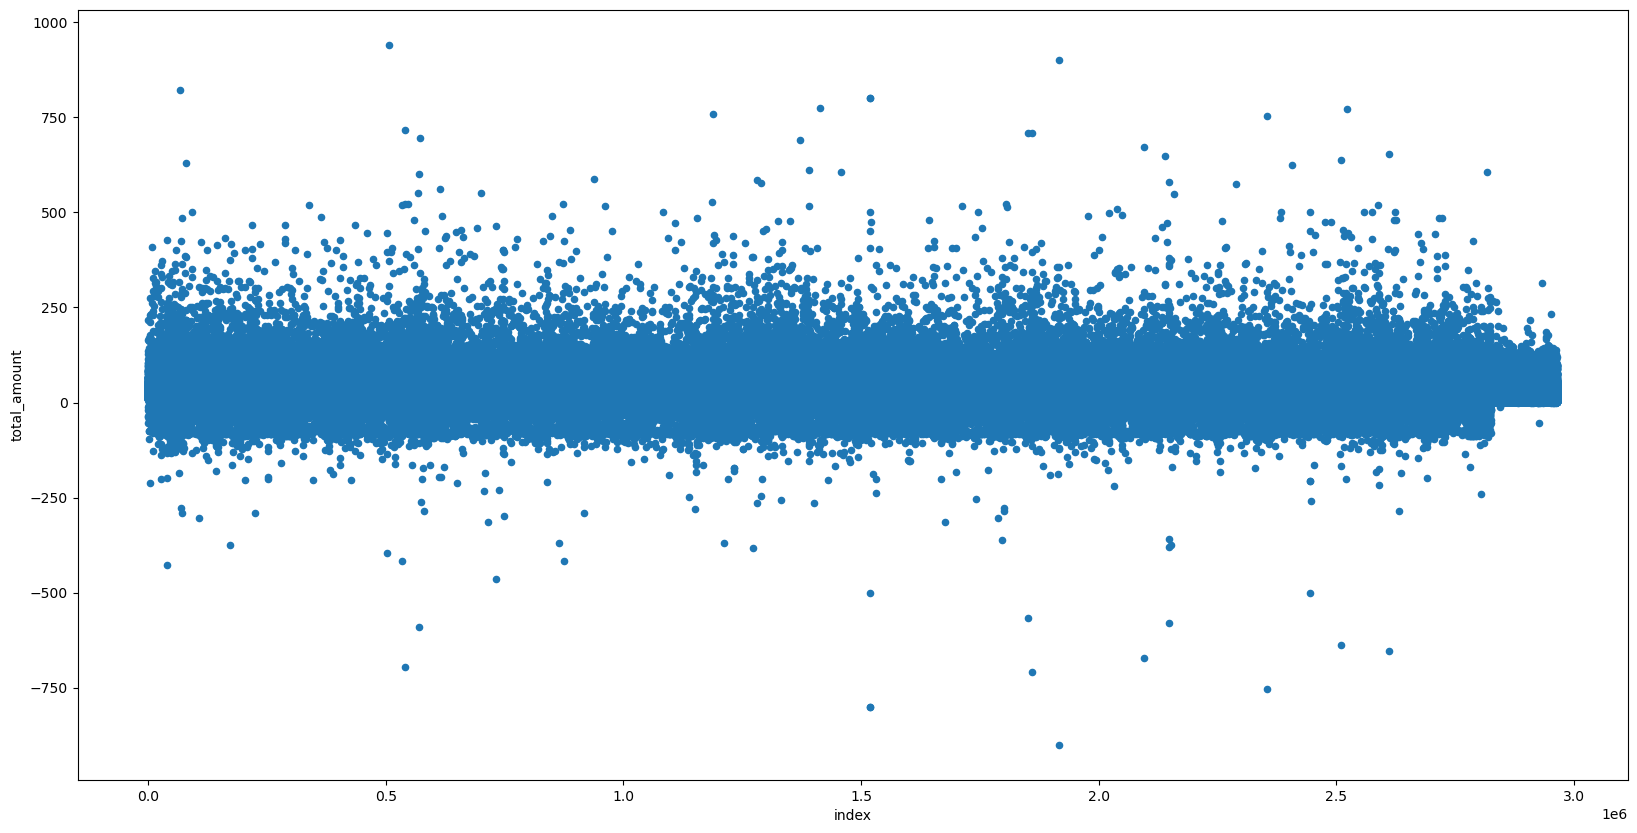

In [272]:
taxi_df[taxi_df['total_amount'] < 1000].reset_index().plot( kind = 'scatter' , y = 'total_amount' , x = 'index' , figsize = (20,10))

In [273]:
 taxi_df[taxi_df['total_amount'] > 400].shape[0]


179

In [274]:
taxi_df[taxi_df['total_amount'] <= 0 ].shape[0]


35920

<Axes: xlabel='index', ylabel='total_amount'>

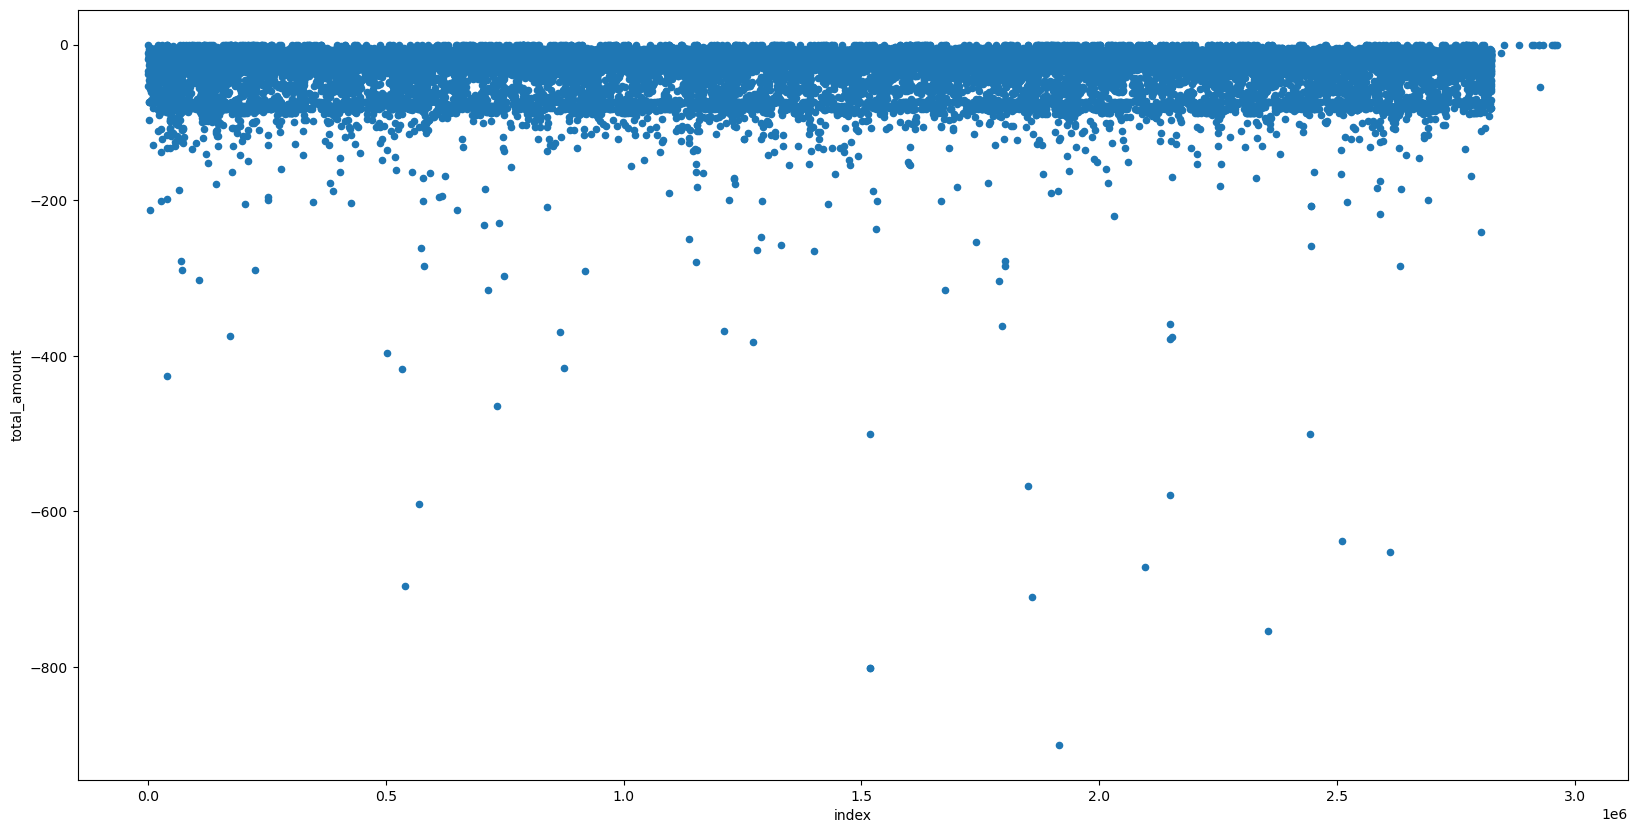

In [276]:
taxi_df[taxi_df['total_amount'] <= 0 ].reset_index().plot(kind = 'scatter' , x = 'index' , y = 'total_amount' , figsize = (20,10))


In [277]:
taxi_df[taxi_df['total_amount'] <= 0 ].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [278]:
(taxi_df[taxi_df['total_amount'] <= 0 ]['payment_type']).value_counts()

payment_type
4    21534
2     8391
3     5824
1      158
0       13
Name: count, dtype: int64

In [279]:
(taxi_df[taxi_df['total_amount'] < 0]['total_amount']).min()

-900.0

In [280]:
#taxi_df['passenger_count'].min()
#taxi_df.reset_index().plot(kind = 'scatter' , x = 'index' , y = 'trip_distance')
#taxi_df[taxi_df['trip_distance']]
#taxi_df['trip_distance'].mean()
#taxi_df[taxi_df['trip_distance'] > 1000].shape[0]
taxi_df['trip_distance'].max()

312722.3

That means around 503277 km 

which literally means 12 time around the planet EARTH :)


it is not possible 

In [282]:
taxi_df[taxi_df['trip_distance'] > 500].shape[0]

25

[Back to List](#contents)

# Data Cleaning <a id ='data_cleaning'></a>

In [285]:
# a = taxi_df[taxi_df['total_amount'] > 400].shape[0]
# b = taxi_df[taxi_df['total_amount'] < 0].shape[0]
# c = taxi_df[taxi_df['trip_distance'] > 500].shape[0]
# d = taxi_df[taxi_df['passenger_count'] == False].shape[0]
# print(a,b,c,d)
# k = a+b+c+d
# print(k)
# meow = taxi_df.shape[0] - k 
# print((k/taxi_df.shape[0])*100)
# print((meow/taxi_df.shape[0]))

In [319]:
clean_df = taxi_df[(taxi_df['total_amount'] < 400) 
& (taxi_df['total_amount'] > 0) 
& (taxi_df['trip_distance'] < 500) 
& (taxi_df['passenger_count'] != False)
] 

a = (clean_df.shape[0])
b = (taxi_df.shape[0])
print(a, b)
print(b - a)
print((a/b)*100)
print(((b-a)/b)*100)


clean_df['passenger_count'].max()

2897061 2964624
67563
97.72102634263233
2.27897365736768


9.0

i don't know what's going on

now i know 
The passenger_count shouldn't be True, instead it should be Not False


In [344]:
aldf = clean_df.copy()
clean_df = clean_df.dropna()
clean_df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [350]:
print((clean_df.shape[0]/
taxi_df.shape[0])*100)


92.99432238287217


[Back to List](#contents)

# Data preparation <a id = 'data_preparation'></a>

In [352]:

prepared_df = clean_df.copy()
prepared_df[prepared_df['total_amount'] > 400].value_counts() # DONE
prepared_df[prepared_df['total_amount'] < 0].value_counts()   # DONE
prepared_df[prepared_df['trip_distance'] > 500].value_counts()# DONE
prepared_df[prepared_df['passenger_count'] == False].value_counts()# DONE


Series([], Name: count, dtype: int64)

In [354]:
#prepared_df.dtypes
prepared_df['passenger_count'] = (prepared_df['passenger_count']).astype(int)
prepared_df['RatecodeID'] = (prepared_df['RatecodeID']).astype(str)
prepared_df['PULocationID'] = (prepared_df['PULocationID']).astype(str)
prepared_df['DOLocationID'] = (prepared_df['DOLocationID']).astype(str)
prepared_df['payment_type'] = (prepared_df['payment_type']).astype(str)

prepared_df.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [306]:
prepared_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2824455,2024-01-31 23:34:34,2024-01-31 23:43:24,1,1.94,1.0,161,79,1,19.68
2824456,2024-01-31 23:15:08,2024-01-31 23:29:33,1,7.68,1.0,230,243,1,43.20
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,1,3.51,1.0,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,1,3.36,1.0,162,261,1,29.25


In [356]:
prepared_df['year'] = prepared_df['tpep_pickup_datetime'].dt.year
prepared_df['month'] = prepared_df['tpep_pickup_datetime'].dt.month
prepared_df['day'] = prepared_df['tpep_pickup_datetime'].dt.day
prepared_df['hour'] = prepared_df['tpep_pickup_datetime'].dt.hour
prepared_df['min'] = prepared_df['tpep_pickup_datetime'].dt.minute


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'min'}>, <Axes: >, <Axes: >]],
      dtype=object)

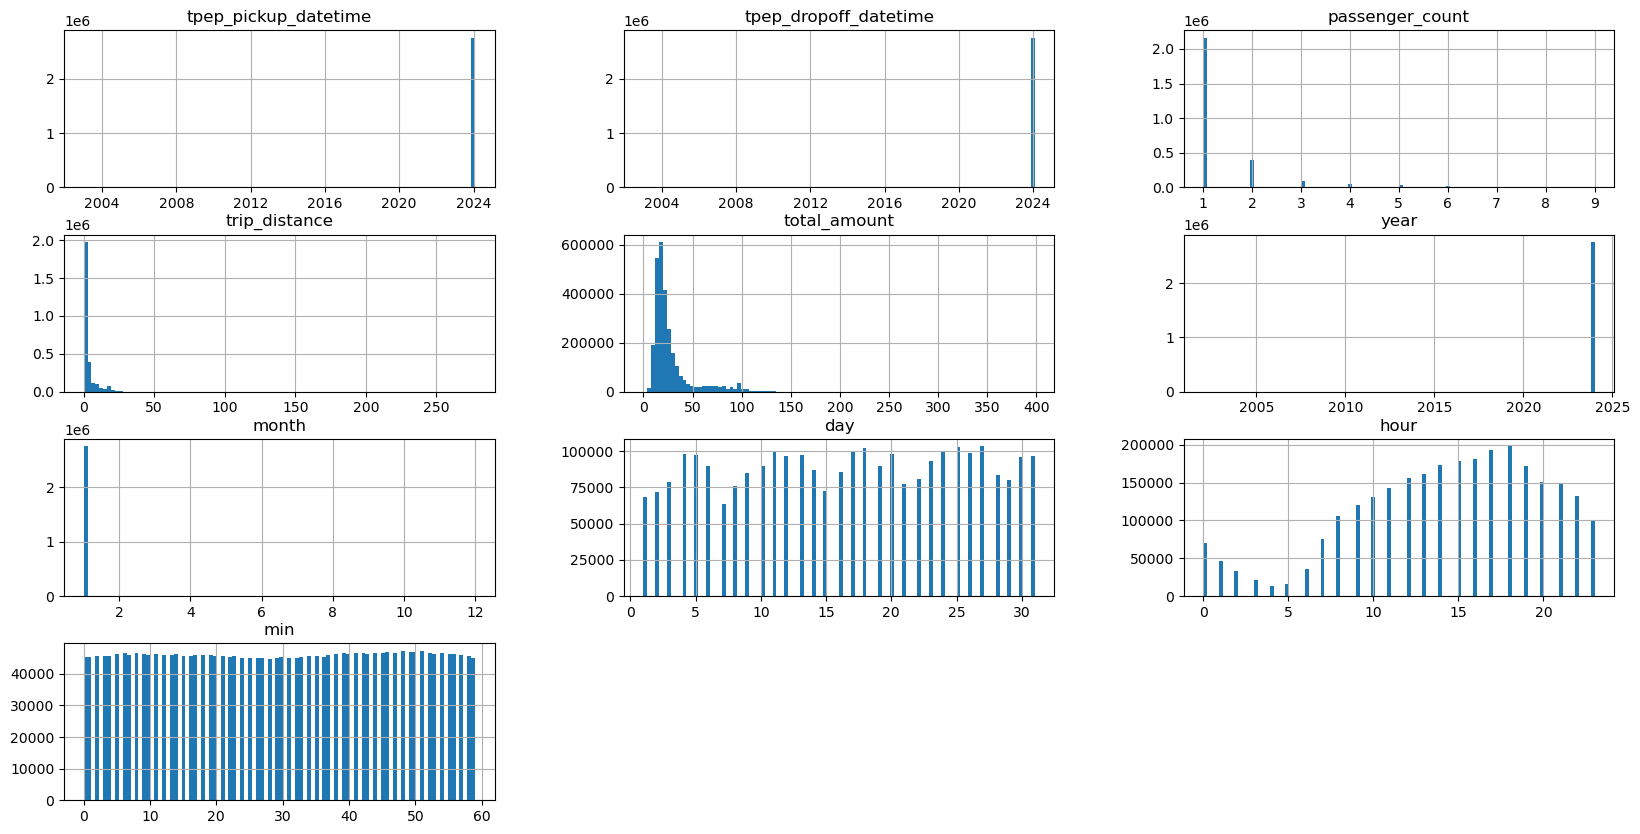

In [362]:
prepared_df.hist(figsize = (20,10) , bins = 100)

In [396]:
print(prepared_df['month'].max(),' ',
prepared_df.iloc[:,1].min())

12   2002-12-31 23:05:41


somthing is going wrong here 

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'min'}>, <Axes: >, <Axes: >]],
      dtype=object)

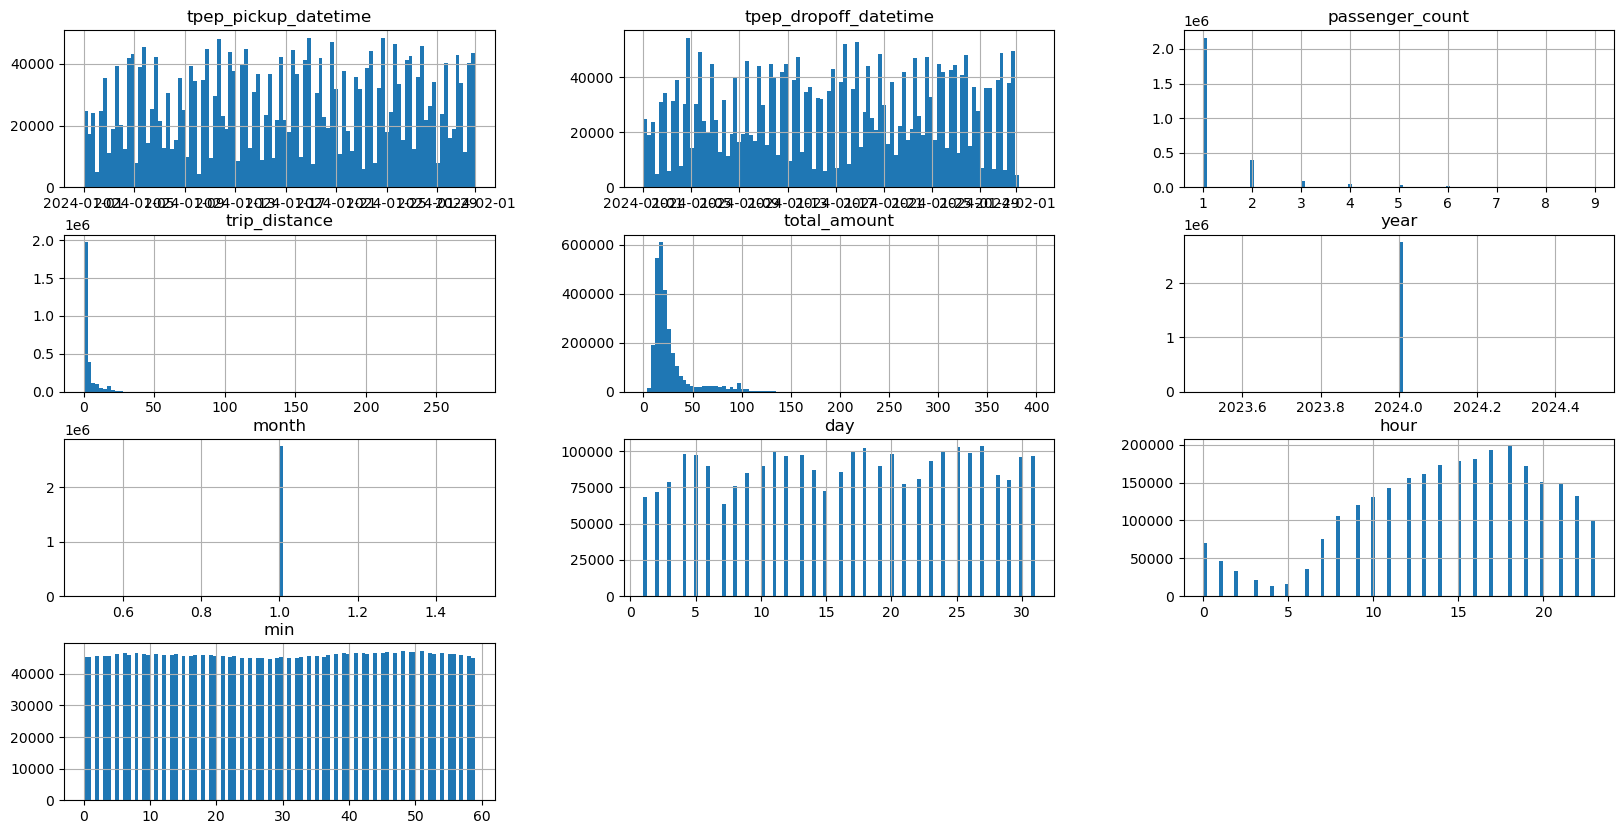

In [400]:
prepared_df = prepared_df[(prepared_df['year'] == 2024) & (prepared_df['month'] == 1) ]
prepared_df.hist(figsize = (20,10) , bins = 100)  #cool

<Axes: >

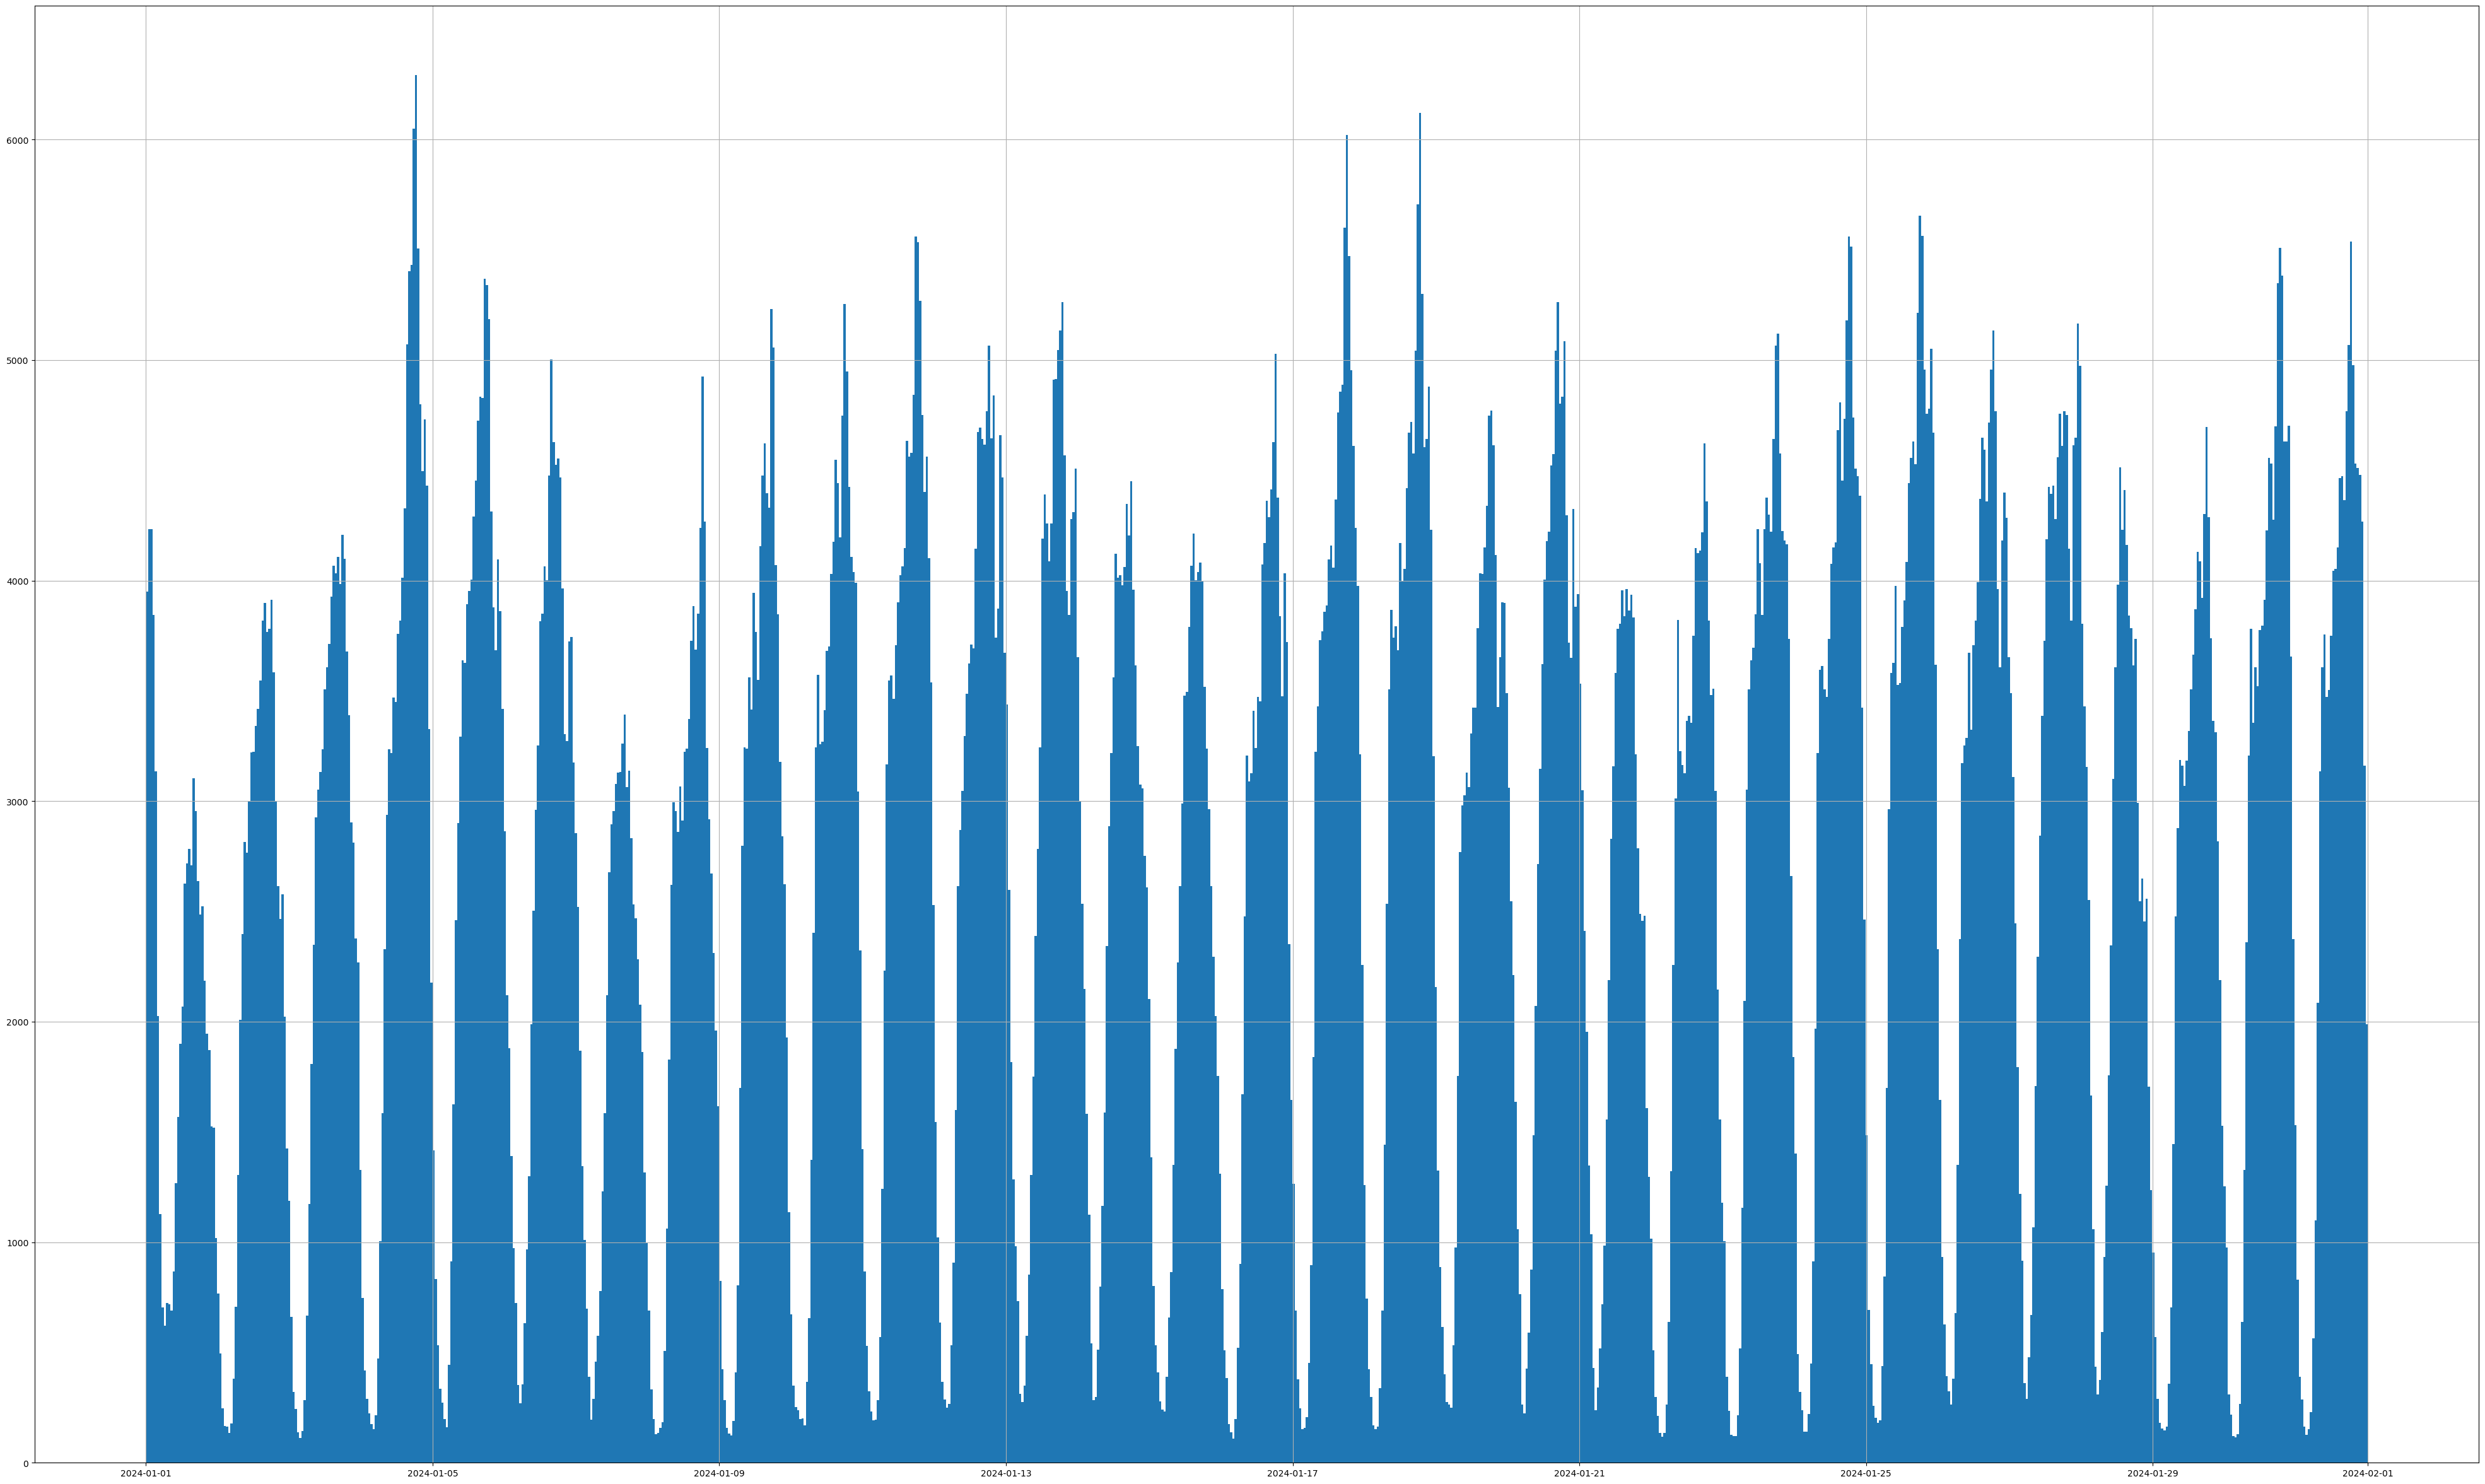

In [420]:
prepared_df.iloc[:,0].hist(bins = 1000 , figsize = (50,30))

[Back to List](#contents)

In [428]:
cat = ['PULocationID' , 'month', 'day','hour','min']
num = ['trip_distance', 'total_amount']
all = cat + num
main = prepared_df[all]
main.head()

,PULocationID,month,day,hour,min,trip_distance,total_amount
0,186,1,1,0,57,1.72,22.70
1,140,1,1,0,3,1.80,18.75
2,236,1,1,0,17,4.70,31.30
3,79,1,1,0,36,1.40,17.00
4,211,1,1,0,46,0.80,16.10


In [463]:
grouped_by_region = main.groupby(cat).mean()
grouped_by_region['count_of_transaction'] = main.groupby(cat).count()['total_amount']
grouped_by_region

trip_distance  total_amount  \
PULocationID month day hour min                                
1            1     1   5    54            0.00        109.20   
                       6    56            0.06        108.00   
                            57            0.00         24.00   
                            59            0.00         96.00   
                       13   44            0.00         99.75   
...                                        ...           ...   
98           1     30  5    25           15.30         70.94   
                   31  5    4            12.50         51.00   
                       10   51           17.10         67.94   
                       12   42            0.60         10.10   
                       17   37            4.15         24.50   

                                 count_of_transaction  
PULocationID month day hour min                        
1            1     1   5    54                      1  
                       6    56                      1  
                            57                      1  
                            59                      1  
                       13   44                      1  
...                                               ...  
98           1     30  5    25                      1  
                   31  5    4                       1  
                       10   51                      1  
                       12   42                      1  
                       17   37                      1  

[1204312 rows x 3 columns]

# Benchmark Model <a id = 'benchmark_model'></a>

In [465]:
data_bench = grouped_by_region.copy()

In [469]:
cat_features = ['PULocationID' , 'month', 'day','hour','min']
input_features = cat_feature + ['trip_distance']
target_features = ['total_amount']

In [473]:
from sklearn.model_selection import train_test_split

x = data_bench.reset_index()[input_features]
y = data_bench.reset_index()[target_features]

x = pd.get_dummies(x)

x_train , x_test , y_train, y_test = train_test_split(x , y , test_size = 0.30 , random_state = 13)

In [479]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train , y_train)


DecisionTreeRegressor(max_depth=10)

In [481]:
y_pred = tree.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 3.611998583455406
mean_squared_error 65.496227140778
root_mean_squared_error 8.092973936741549
r2 0.817163784090628


<Axes: xlabel='true', ylabel='pred'>

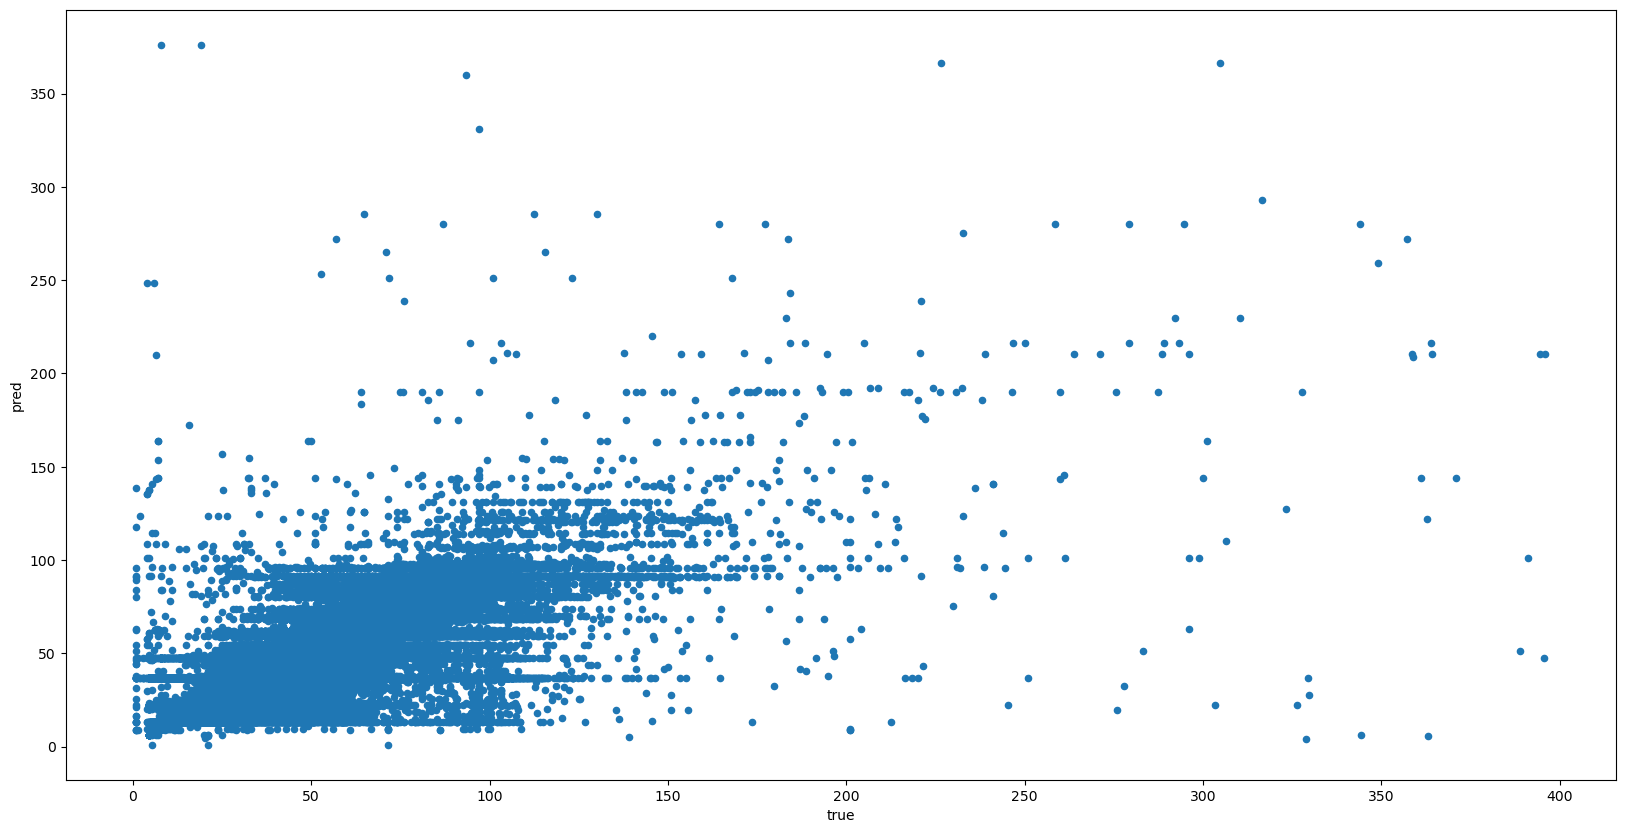

In [491]:
y_test = np.array(y_test).ravel()
y_pred = np.array(y_pred).ravel()

data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [515]:
cat_features = ['PULocationID','year', 'month','day','hour']
input_features  = cat_features
target_feature  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_bench[input_features]
y_bench = data_bench[target_features]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

x_train, x_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train, y_train)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred_b)))
print('r2', r2_score(y_test, y_pred_b))

KeyError: "None of [Index(['PULocationID', 'year', 'month', 'day', 'hour'], dtype='object')] are in the [columns]"

In [33]:
#here

[Back to List](#contents)

# Feature Engineering<a id='feature_engineering'></a>

In [ ]:
#here

[Back to List](#contents)

# Decision tree <a id = 'decision_tree'></a>

In [ ]:
#here

[Back to List](#contents)

# Random Forest <a id ='random_forest'></a>

In [ ]:
#here

[Back to List](#contents)

# Compare algorithm performances <a id = 'compare_performances'><a/>

In [ ]:
#here

[Back to List](#contents)

# Tuning <a id = 'tuning'></a>

In [ ]:
#here

[Back to List](#contents)